In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('customer_shopping_data.csv')
df = pd.DataFrame(data)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
df.shape

(99457, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [5]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [6]:
df = df.drop_duplicates()

In [7]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_6836\3872937534.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 8.3+ MB


In [9]:
df.describe().round(2)

,age,quantity,price
count,99457.00,99457.00,99457.00
mean,43.43,3.00,689.26
std,14.99,1.41,941.18
min,18.00,1.00,5.23
25%,30.00,2.00,45.45
50%,43.00,3.00,203.30
75%,56.00,4.00,1200.32
max,69.00,5.00,5250.00


ANALYSIS BASED ON GENDER

<Axes: xlabel='gender', ylabel='price'>

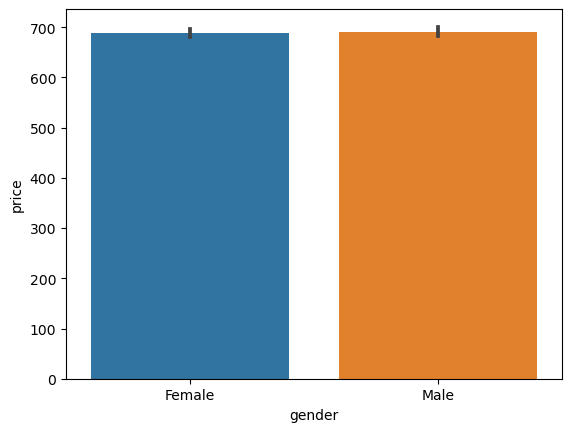

In [10]:
sns.barplot(x = 'gender', y = 'price',data = df)

ANALYSIS BASED ON PAYMENT MODE

<Axes: xlabel='payment_method', ylabel='price'>

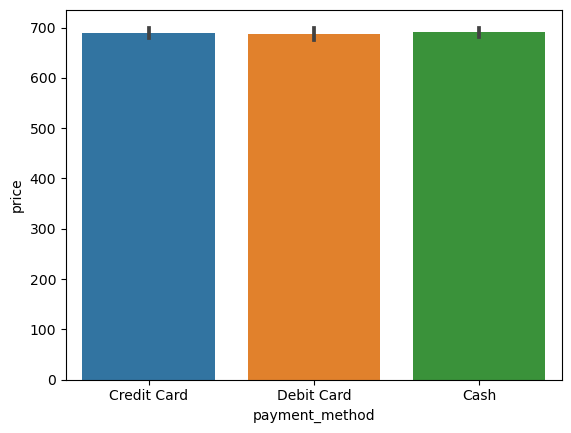

In [11]:
sns.barplot(x = 'payment_method', y = 'price',data = df)

<Axes: xlabel='payment_method', ylabel='Count'>

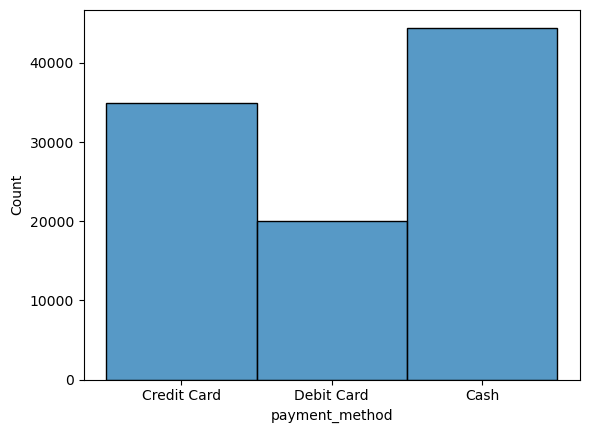

In [39]:
sns.histplot(x = 'payment_method', data = df)

<Axes: xlabel='payment_method', ylabel='age'>

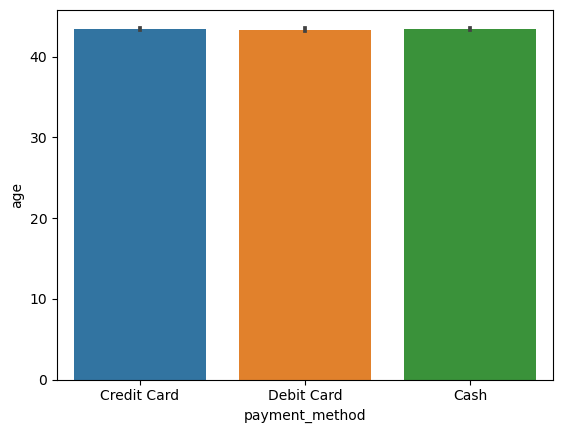

In [46]:
sns.barplot(x = 'payment_method', y = 'age',data = df)

ANALYSIS BASED ON SHOPPING MALL

<Axes: xlabel='shopping_mall', ylabel='price'>

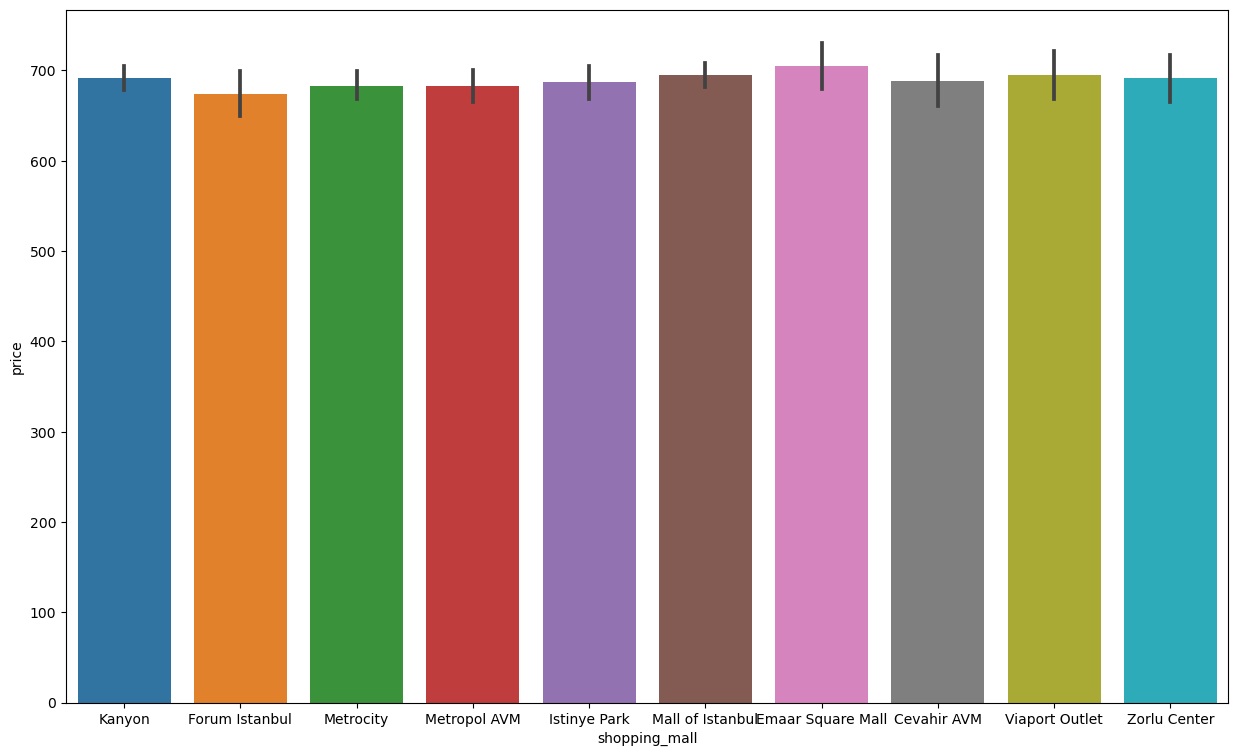

In [15]:
plt.figure(figsize=(15,9))
sns.barplot(x = 'shopping_mall', y = 'price',data = df)

<Axes: xlabel='shopping_mall', ylabel='Count'>

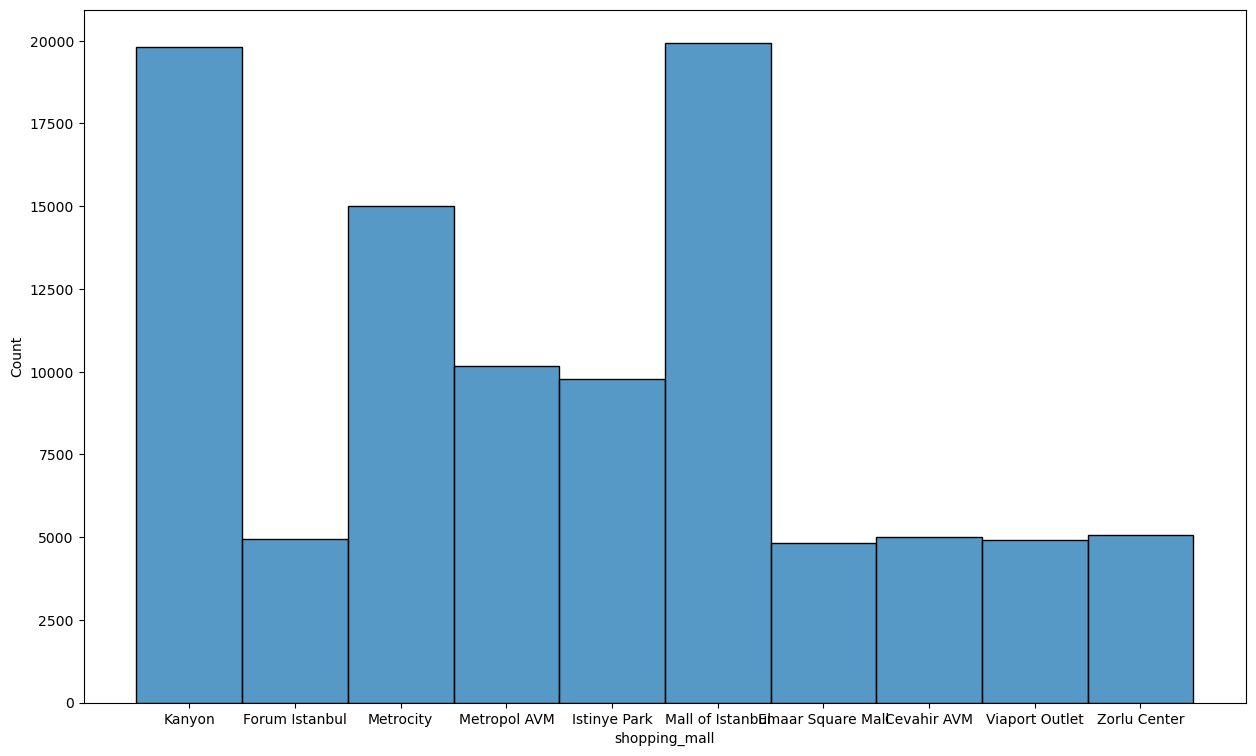

In [43]:
plt.figure(figsize=(15,9))
sns.histplot(x = 'shopping_mall', data = df)

In [16]:
age_groups = [18, 24, 34, 44, 54, 64, 70]
labels = ['18-24','25-34','35-44','45-54','55-64','65-70']
df['age_group'] = pd.cut(df['age'],bins=age_groups, labels =labels)
age_cats = pd.CategoricalDtype(['18-24','25-34','35-44','45-54','55-64','65-70'], ordered=True)
df['age_group'] = df['age_group'].astype(age_cats)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,18-24
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,65-70
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,45-54


ANALYSIS BASED ON AGE GROUP

<Axes: xlabel='age_group', ylabel='Count'>

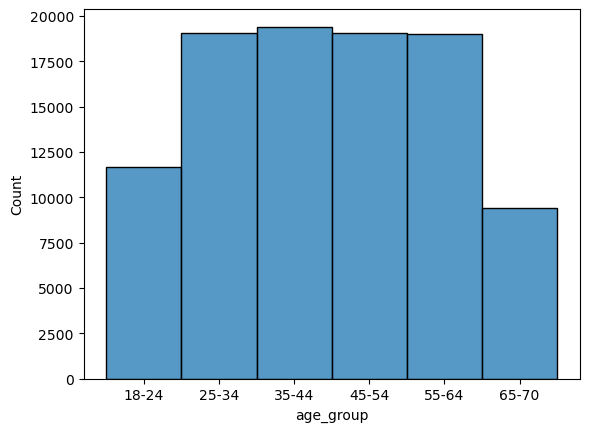

In [17]:
sns.histplot(x = 'age_group', data = df)

<Axes: xlabel='gender', ylabel='age'>

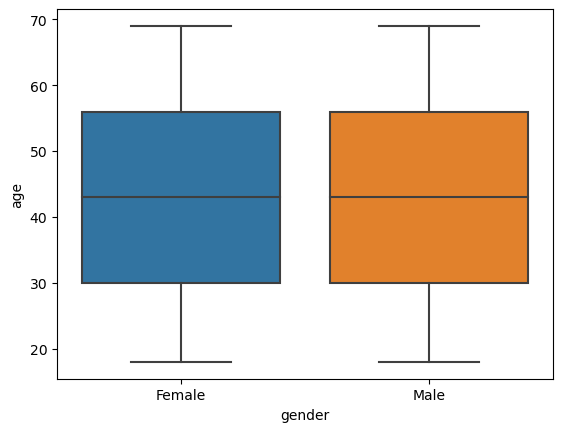

In [18]:
sns.boxplot(x = 'gender',y = 'age',data = df)

<Axes: xlabel='age_group', ylabel='price'>

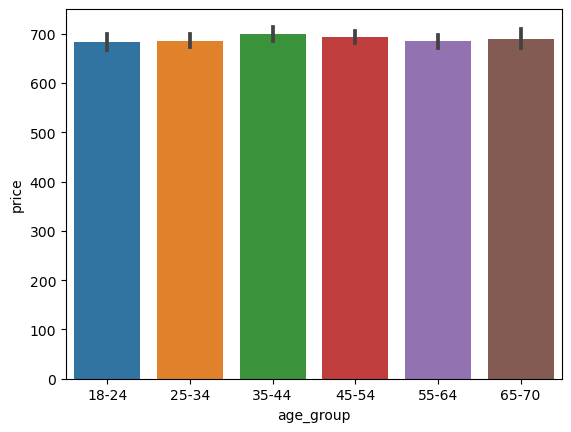

In [20]:
sns.barplot(x = 'age_group', y = 'price',data = df)

ANALYSIS BASED ON PRODUCT CATEGORY

<Axes: xlabel='category', ylabel='price'>

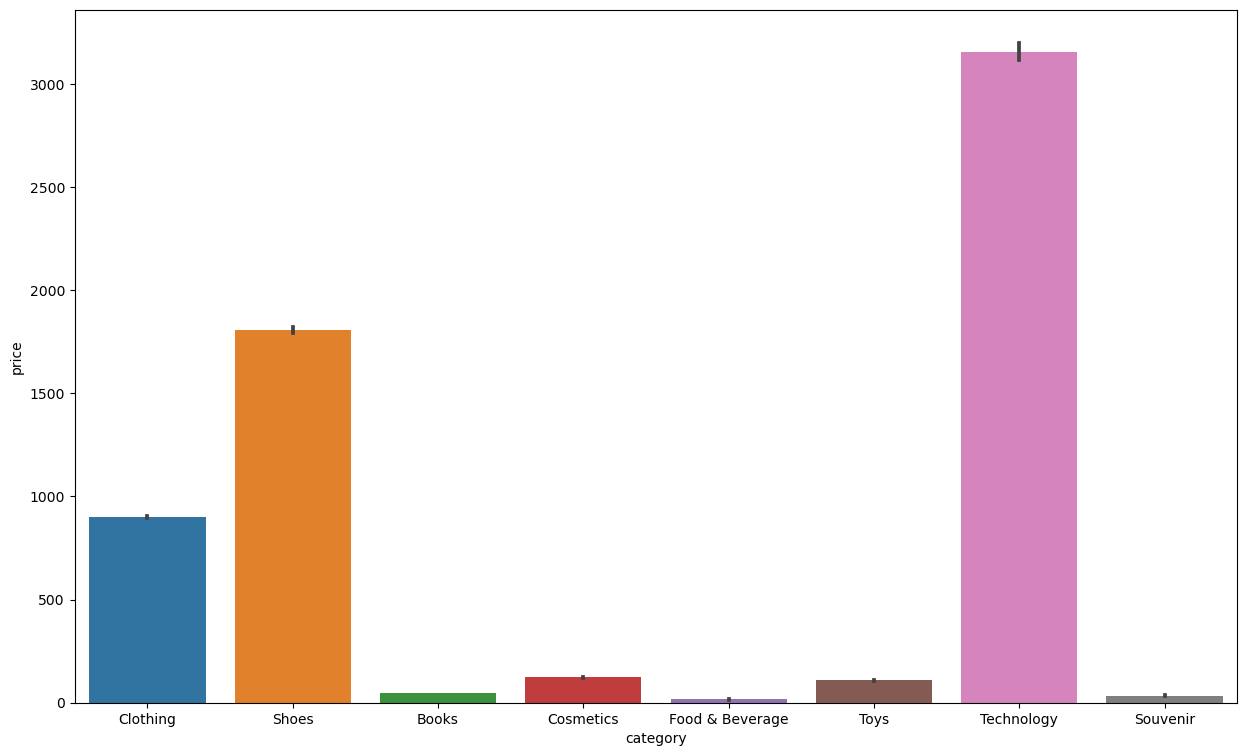

In [64]:
plt.figure(figsize = (15,9))
sns.barplot(x = 'category', y = 'price',data = df)

In [71]:
df.groupby(['category','gender']).count()

invoice_no  customer_id    age  quantity  price  \
category        gender                                                    
Books           Female        2906         2906   2906      2906   2906   
                Male          2075         2075   2075      2075   2075   
Clothing        Female       20652        20652  20652     20652  20652   
                Male         13835        13835  13835     13835  13835   
Cosmetics       Female        9070         9070   9070      9070   9070   
                Male          6027         6027   6027      6027   6027   
Food & Beverage Female        8804         8804   8804      8804   8804   
                Male          5972         5972   5972      5972   5972   
Shoes           Female        5967         5967   5967      5967   5967   
                Male          4067         4067   4067      4067   4067   
Souvenir        Female        3017         3017   3017      3017   3017   
                Male          1982         1982   1982      1982   1982   
Technology      Female        2981         2981   2981      2981   2981   
                Male          2015         2015   2015      2015   2015   
Toys            Female        6085         6085   6085      6085   6085   
                Male          4002         4002   4002      4002   4002   

                        payment_method  invoice_date  shopping_mall  \
category        gender                                                
Books           Female            2906          2906           2906   
                Male              2075          2075           2075   
Clothing        Female           20652         20652          20652   
                Male             13835         13835          13835   
Cosmetics       Female            9070          9070           9070   
                Male              6027          6027           6027   
Food & Beverage Female            8804          8804           8804   
                Male              5972          5972           5972   
Shoes           Female            5967          5967           5967   
                Male              4067          4067           4067   
Souvenir        Female            3017          3017           3017   
                Male              1982          1982           1982   
Technology      Female            2981          2981           2981   
                Male              2015          2015           2015   
Toys            Female            6085          6085           6085   
                Male              4002          4002           4002   

                        age_group  month   year  
category        gender                           
Books           Female       2840   2906   2906  
                Male         2035   2075   2075  
Clothing        Female      20266  20652  20652  
                Male        13575  13835  13835  
Cosmetics       Female       8905   9070   9070  
                Male         5925   6027   6027  
Food & Beverage Female       8649   8804   8804  
                Male         5846   5972   5972  
Shoes           Female       5866   5967   5967  
                Male         3997   4067   4067  
Souvenir        Female       2961   3017   3017  
                Male         1930   1982   1982  
Technology      Female       2929   2981   2981  
                Male         1978   2015   2015  
Toys            Female       5987   6085   6085  
                Male         3924   4002   4002

<Axes: xlabel='category', ylabel='count'>

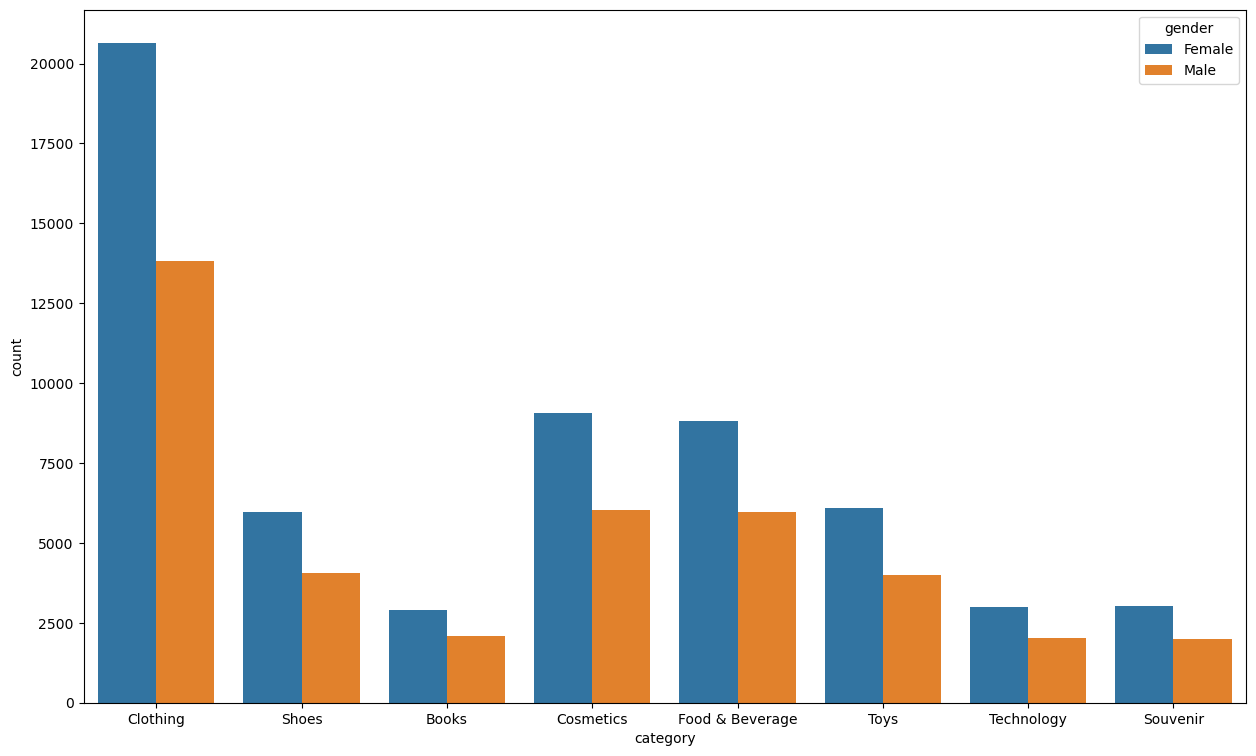

In [80]:
plt.figure(figsize = (15,9))
sns.countplot(x = 'category',data = df,hue = 'gender')

<Axes: xlabel='category', ylabel='count'>

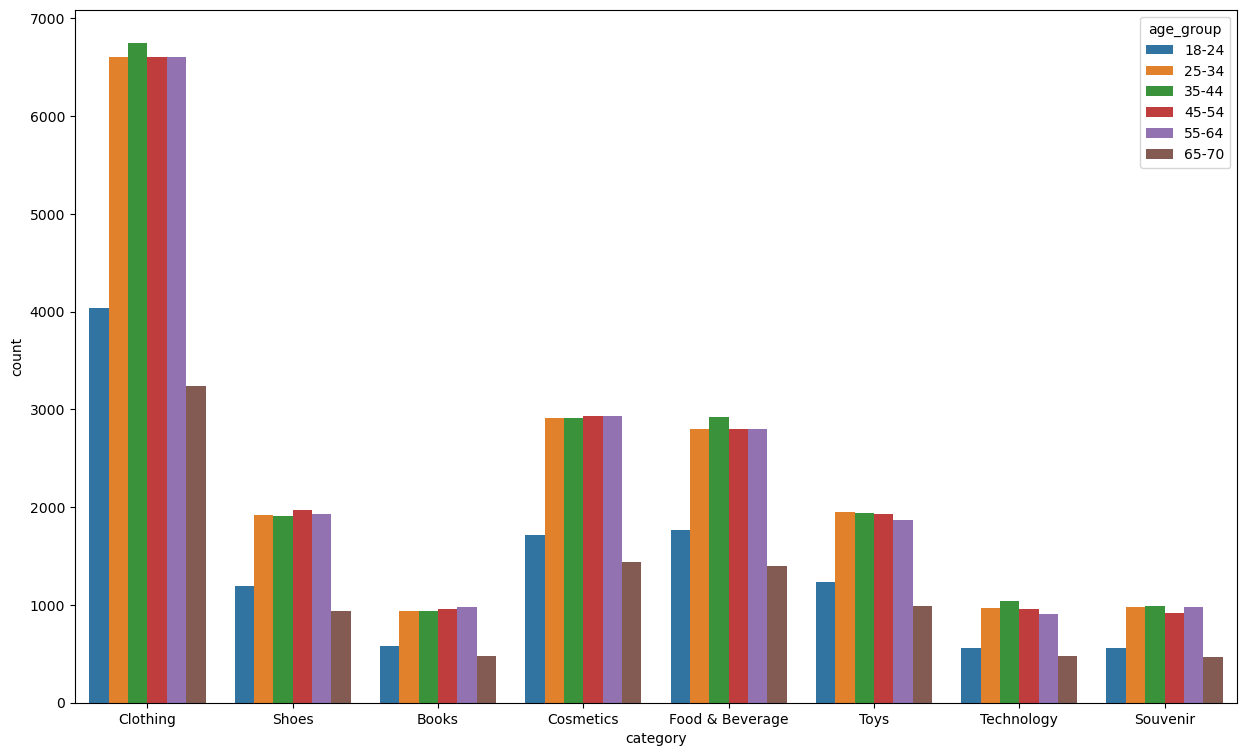

In [81]:
plt.figure(figsize = (15,9))
sns.countplot(x = 'category',data = df,hue = 'age_group')

In [21]:
df['month'] = df['invoice_date'].dt.month
df['year'] = df['invoice_date'].dt.year
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group,month,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,25-34,5,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,18-24,12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,18-24,9,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,65-70,5,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,45-54,10,2021


In [49]:
df['year'] = df['year'].map(str)
df['month'] = df['month'].map(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  age_group       97613 non-null  category      
 11  month           99457 non-null  object        
 12  year            99457 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 10.0+ MB


SALES ANALYSIS

C:\Users\DELL\AppData\Local\Temp\ipykernel_6836\2161576339.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df.groupby('year').sum()


<Axes: xlabel='year', ylabel='price'>

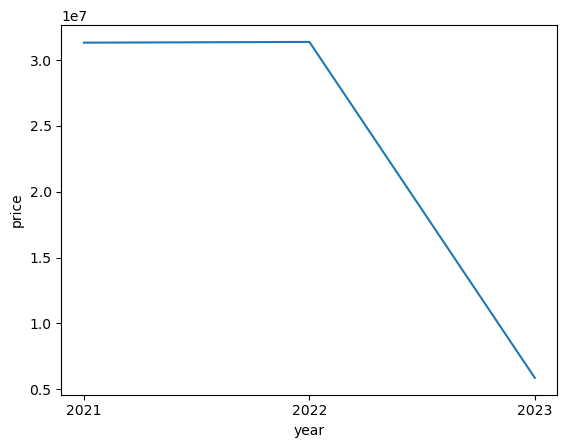

In [50]:
df1 = df.groupby('year').sum()
sns.lineplot(x = 'year',y = 'price',data = df1)

In [57]:
sales_in_2021 = df[df['year'] == '2021']
sales_in_2022 = df[df['year'] == '2022']
sales_in_2023 = df[df['year'] == '2023']

C:\Users\DELL\AppData\Local\Temp\ipykernel_6836\4053965348.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(month_list,sales_in_2021.groupby('month').sum()['price'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_6836\4053965348.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(month_list,sales_in_2022.groupby('month').sum()['price'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_6836\4053965348.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns

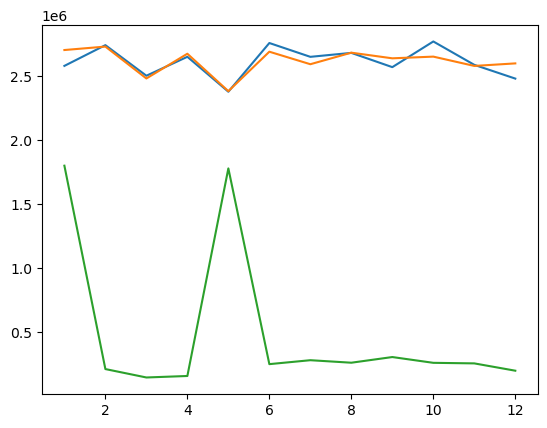

In [59]:
month_list = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(month_list,sales_in_2021.groupby('month').sum()['price'])
plt.plot(month_list,sales_in_2022.groupby('month').sum()['price'])
plt.plot(month_list,sales_in_2023.groupby('month').sum()['price'])
plt.show()